In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_excel(r"C:\Users\adity\Documents\Python Script\EDA\Data Model - Pizza Sales.xlsx")

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [8]:
#pip install openpyxl

In [9]:
df.shape

(48620, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


In [11]:
df.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [12]:
df.dtypes

order_details_id              int64
order_id                      int64
pizza_id                     object
quantity                      int64
order_date           datetime64[ns]
order_time                   object
unit_price                  float64
total_price                 float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
dtype: object

In [13]:
df.nunique()

order_details_id     48620
order_id             21350
pizza_id                91
quantity                 4
order_date             358
order_time           16382
unit_price              25
total_price             56
pizza_size               5
pizza_category           4
pizza_ingredients       32
pizza_name              32
dtype: int64

In [14]:
columns = df.drop(['order_details_id', 'order_id', 'pizza_id','order_date', 'order_time'], axis=1).columns

In [15]:
columns.tolist()

['quantity',
 'unit_price',
 'total_price',
 'pizza_size',
 'pizza_category',
 'pizza_ingredients',
 'pizza_name']

In [16]:
for col in columns:
    print(col, df[col].unique())
    print('-----------------------------------')

quantity [1 2 3 4]
-----------------------------------
unit_price [13.25 16.   18.5  20.75 16.5  12.75 12.   12.5  20.5  20.25 16.75 15.25
 17.95 16.25 14.75  9.75 17.5  10.5  25.5  11.   14.5  12.25 21.   23.65
 35.95]
-----------------------------------
total_price [13.25 16.   18.5  20.75 16.5  12.75 12.   12.5  20.5  20.25 16.75 15.25
 17.95 16.25 14.75 32.    9.75 17.5  10.5  25.5  11.   14.5  12.25 21.
 62.25 41.5  50.25 23.65 24.   33.5  35.9  25.   19.5  37.5  37.   41.
 33.   40.5  24.5  47.3  22.   35.95 29.   29.5  26.5  48.75 32.5  30.5
 48.   51.   36.   35.   83.   61.5  49.5  55.5 ]
-----------------------------------
pizza_size ['M' 'L' 'S' 'XL' 'XXL']
-----------------------------------
pizza_category ['Classic' 'Veggie' 'Supreme' 'Chicken']
-----------------------------------
pizza_ingredients ['Sliced Ham, Pineapple, Mozzarella Cheese'
 'Pepperoni, Mushrooms, Red Onions, Red Peppers, Bacon'
 'Mozzarella Cheese, Provolone Cheese, Smoked Gouda Cheese, Romano Cheese, Bl

### **Data Cleaning**

In [17]:
df.isnull().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df[df.quantity > 2]

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
183,184,78,spicy_ital_l,3,2015-01-02,12:28:14,20.75,62.25,L,Supreme,"Capocollo, Tomatoes, Goat Cheese, Artichokes, ...",The Spicy Italian Pizza
341,342,144,bbq_ckn_m,3,2015-01-03,13:44:28,16.75,50.25,M,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza
902,903,394,pepperoni_m,3,2015-01-07,14:02:18,12.50,37.50,M,Classic,"Mozzarella Cheese, Pepperoni",The Pepperoni Pizza
5894,5895,2612,sicilian_m,3,2015-02-13,13:43:11,16.25,48.75,M,Supreme,"Coarse Sicilian Salami, Tomatoes, Green Olives...",The Sicilian Pizza
7104,7105,3136,sicilian_m,3,2015-02-22,12:39:19,16.25,48.75,M,Supreme,"Coarse Sicilian Salami, Tomatoes, Green Olives...",The Sicilian Pizza
11976,11977,5264,big_meat_s,4,2015-03-30,13:24:35,12.00,48.00,S,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",The Big Meat Pizza
16830,16831,7404,big_meat_s,3,2015-05-04,18:44:26,12.00,36.00,S,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",The Big Meat Pizza
18317,18318,8040,thai_ckn_l,3,2015-05-15,14:13:27,20.75,62.25,L,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",The Thai Chicken Pizza
18875,18876,8286,big_meat_s,4,2015-05-19,12:42:46,12.00,48.00,S,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",The Big Meat Pizza
20574,20575,9037,spicy_ital_s,3,2015-06-01,12:18:44,12.50,37.50,S,Supreme,"Capocollo, Tomatoes, Goat Cheese, Artichokes, ...",The Spicy Italian Pizza


### **Creating a New Feature**

In [20]:
df1 = df.drop(['order_details_id', 'order_id'], axis=1)

In [21]:
df1['Month'] = df1['order_date'].dt.month

In [22]:
df1['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [23]:
df1['Quater'] = df1['order_date'].dt.quarter

In [24]:
df1['Quater'].unique()

array([1, 2, 3, 4], dtype=int32)

In [25]:
df1['Order_Hours'] = pd.to_datetime(df1['order_time'], format='%H:%M:%S').dt.hour

In [26]:
df1['Order_Hours'].unique()

array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 10,  9],
      dtype=int32)

In [27]:
def get_times(hours):
    if hours in [9,10,11]:
        return 'Morning'
    elif hours in [12,13,14, 15]:
        return 'Afternoon'
    elif hours in [16,17,18,19]:
        return 'Evening'
    else:
        return 'Night'

In [28]:
df1['Times'] = df1['Order_Hours'].apply(get_times)

In [29]:
df1['Times'].unique()

array(['Morning', 'Afternoon', 'Evening', 'Night'], dtype=object)

In [30]:
df1.head()

,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Month,Quater,Order_Hours,Times
0,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,1,1,11,Morning
1,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,1,1,11,Morning
2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,1,1,11,Morning
3,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,1,1,11,Morning
4,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,1,1,11,Morning


In [31]:
df2 = df1.drop(['order_date', 'order_time'], axis=1)

In [32]:
df2.head()

,pizza_id,quantity,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Month,Quater,Order_Hours,Times
0,hawaiian_m,1,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,1,1,11,Morning
1,classic_dlx_m,1,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,1,1,11,Morning
2,five_cheese_l,1,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,1,1,11,Morning
3,ital_supr_l,1,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,1,1,11,Morning
4,mexicana_m,1,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,1,1,11,Morning


### **Data Visualization**

In [33]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity,48620.0,1.019622,0.143077,1.00,1.00,1.0,1.00,4.00
unit_price,48620.0,16.494132,3.621789,9.75,12.75,16.5,20.25,35.95
total_price,48620.0,16.821474,4.437398,9.75,12.75,16.5,20.50,83.00
Month,48620.0,6.451131,3.435420,1.00,3.00,6.0,9.00,12.00
Quater,48620.0,2.486672,1.113634,1.00,1.00,2.0,3.00,4.00
Order_Hours,48620.0,15.911806,3.149836,9.00,13.00,16.0,18.00,23.00


In [34]:
df2.describe(include='object').T

,count,unique,top,freq
pizza_id,48620,91,big_meat_s,1811
pizza_size,48620,5,L,18526
pizza_category,48620,4,Classic,14579
pizza_ingredients,48620,32,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2416
pizza_name,48620,32,The Classic Deluxe Pizza,2416
Times,48620,4,Afternoon,19437


In [35]:
cat = df2.select_dtypes(include='object').columns.tolist()
num = df2.select_dtypes(exclude='object').columns.tolist()

print(cat)
print(num)

['pizza_id', 'pizza_size', 'pizza_category', 'pizza_ingredients', 'pizza_name', 'Times']
['quantity', 'unit_price', 'total_price', 'Month', 'Quater', 'Order_Hours']


quantity


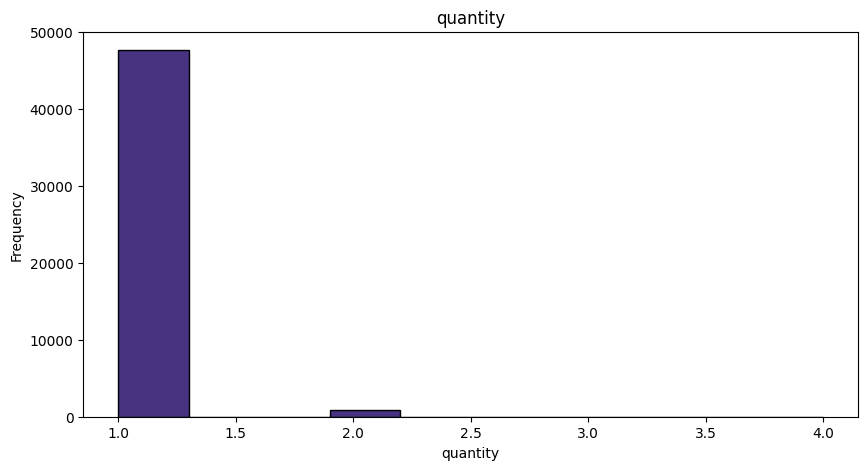

unit_price


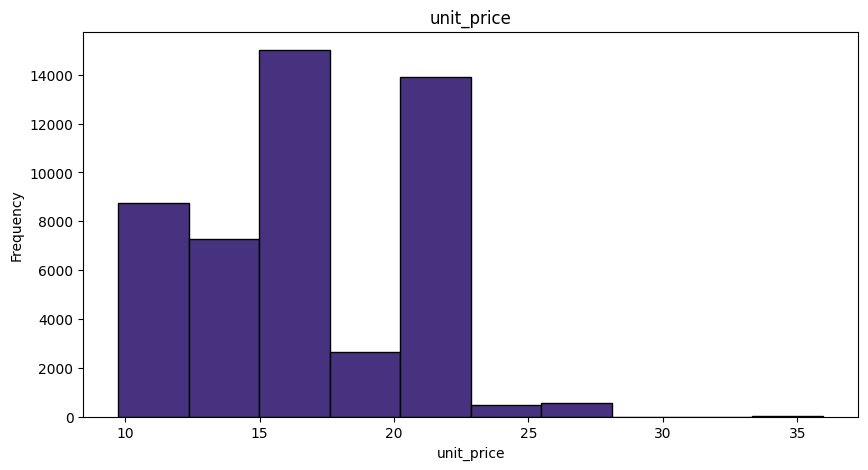

total_price


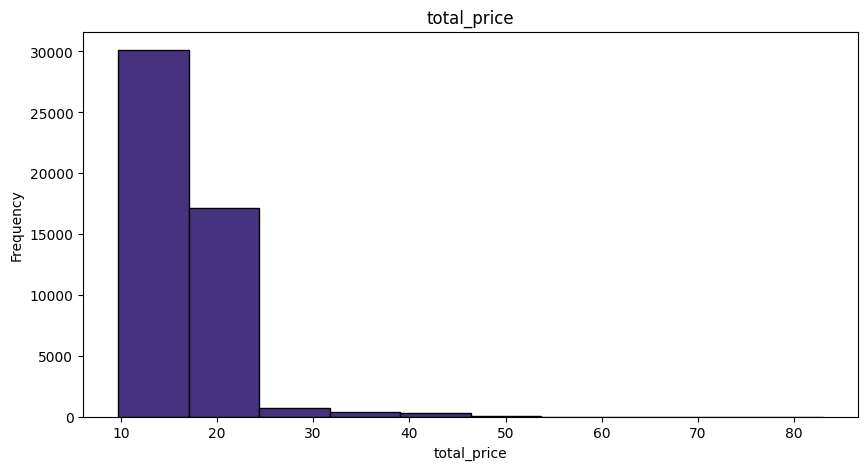

Month


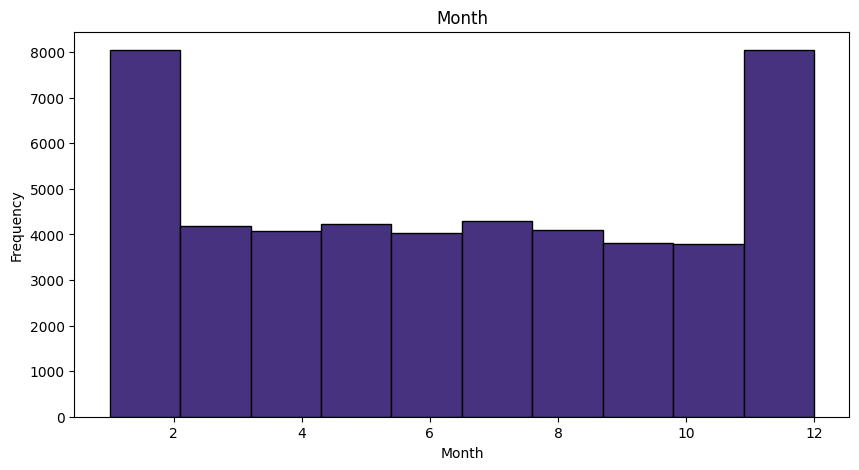

Quater


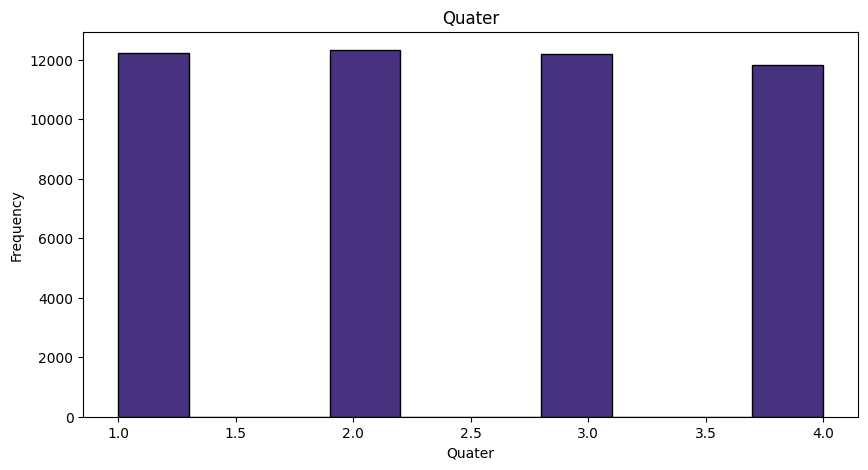

Order_Hours


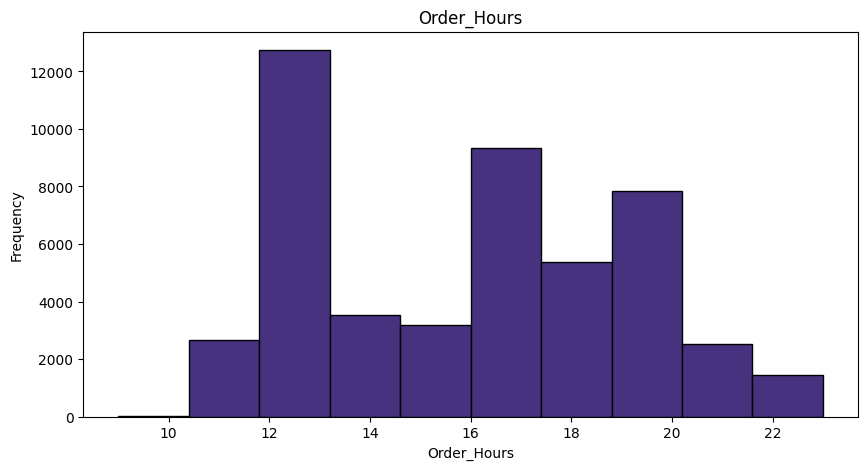

In [36]:
for col in num:
    print(col)
    
    plt.figure(figsize=(10,5))
    df2[col].plot(kind='hist', edgecolor='black', color=sns.color_palette('viridis'))
    plt.ylabel('Frequency')
    plt.xlabel(col)
    plt.title(col)
    plt.show()

pizza_id


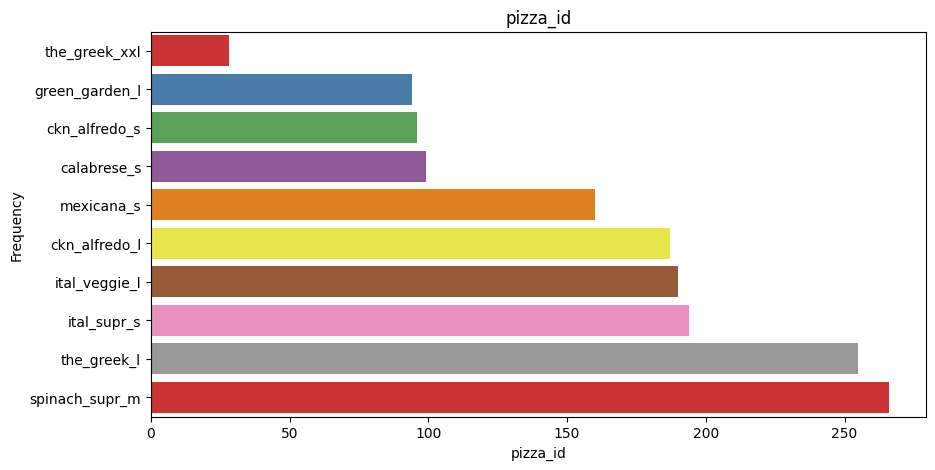

pizza_size


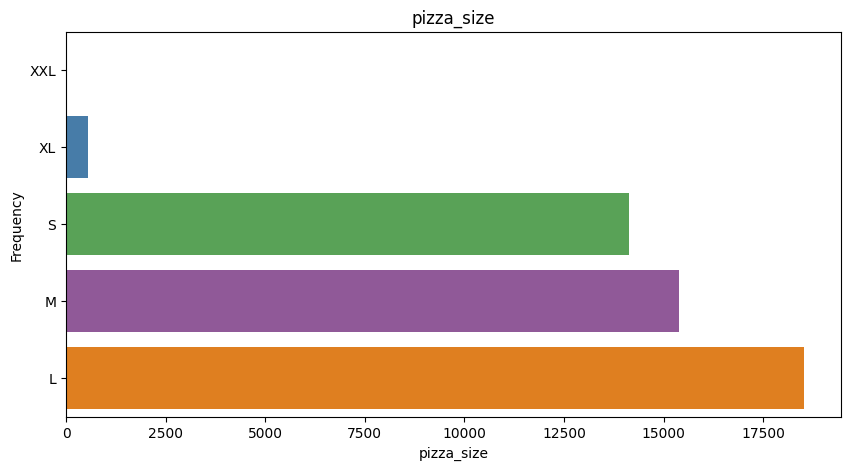

pizza_category


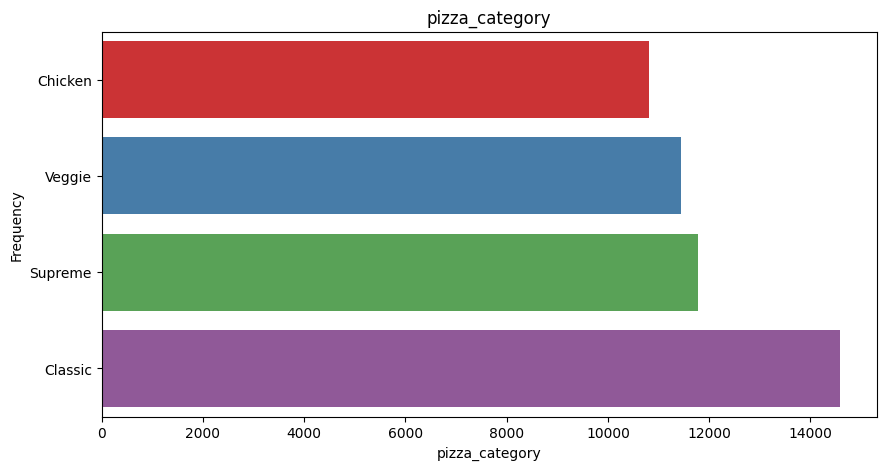

pizza_ingredients


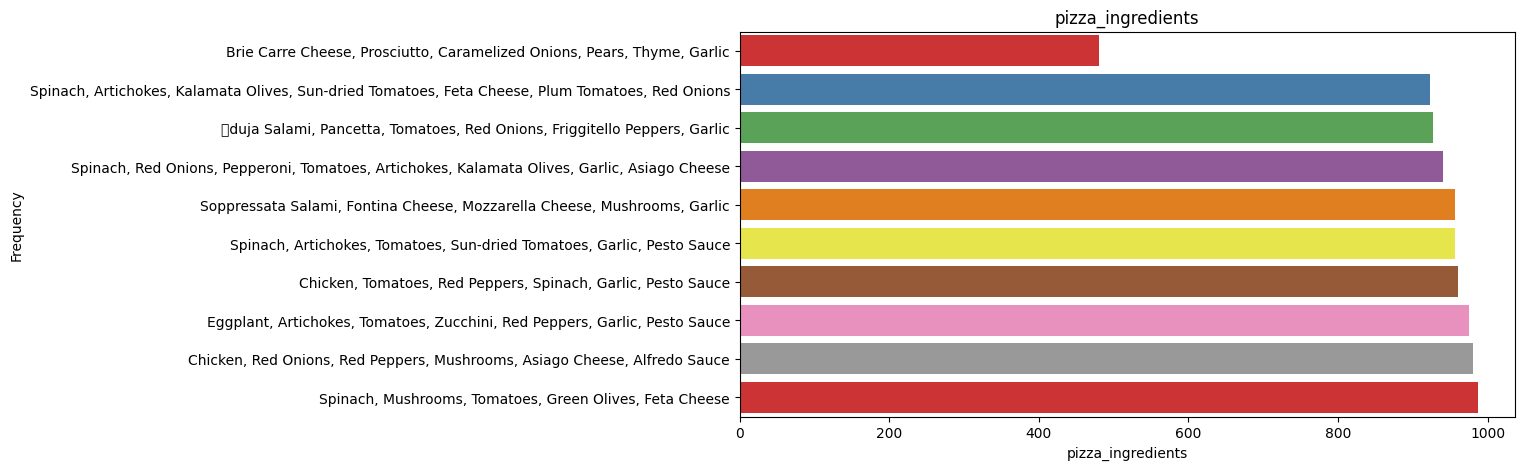

pizza_name


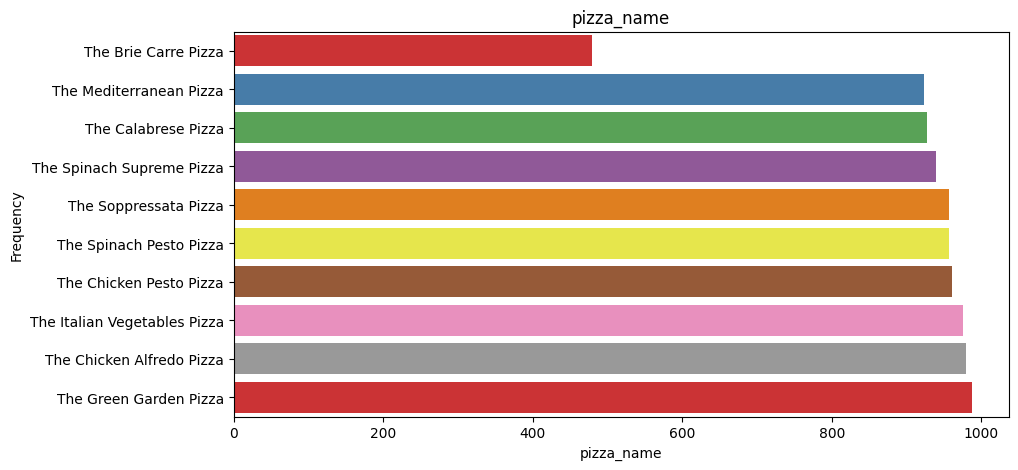

Times


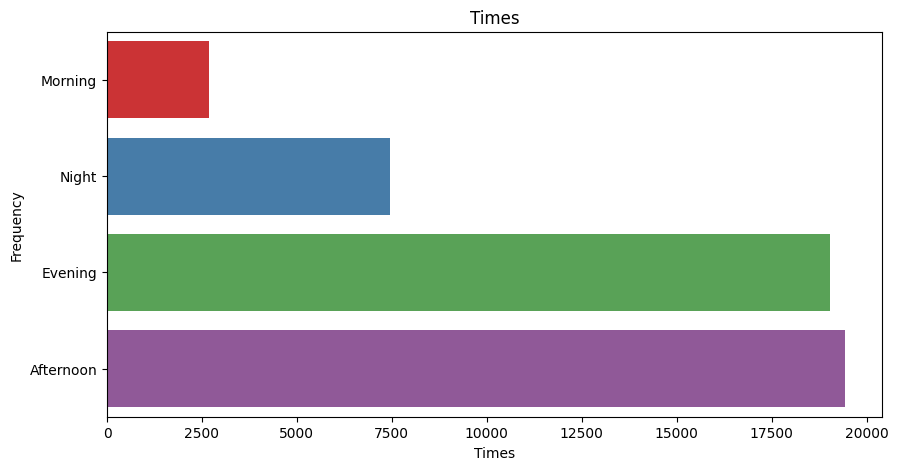

In [37]:
for col in cat:
    print(col)  
    
    plt.figure(figsize=(10,5))
    bar_value = sns.countplot(df2[col],palette='Set1', order=df2[col].value_counts().sort_values().head(10).index)
    plt.ylabel('Frequency')
    plt.xlabel(col)
    plt.title(col)
    plt.show()